# Gyroscope DDPG reward function testing (spinup library)

In [2]:
import gym
from gym import spaces
from gym.utils import seeding
from gym.envs.registration import register

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
#from vpython import *
from functools import partial


register(id='gyroscopeenv-v0',entry_point='gym_GyroscopeEnv.envs:GyroscopeEnv')

## Training

#### Quadratic reward

In [2]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q', exp_name='ddpg_q')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110)",
    "epochs":	100,
    "exp_name":	"ddpg_q",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f76adf1bc18>":	{
            "epoch_dict":	{},
            "exp_name":	"ddpg_q",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"ddpg_q",
            "output_file":	{
                "<_io.TextIOWrapper name='ddpg_q/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -6.77e+03 |
|          StdEpRet |         1.6e+03 |
|          MaxEpRet |       -4.39e+03 |
|          MinEpRet |       -1.04e+04 |
|  AverageTestEpRet |       -7.26e+03 |
|      StdTestEpRet |        2.44e+03 |
|      MaxTestEpRet |       -3.51e+03 |
|      MinTestEpRet |       -1.11e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -107 |
|          StdQVals |            60.6 |
|          MaxQVals |           0.149 |
|          MinQVals |            -382 |
|            LossPi |             104 |
|             LossQ |        1.28e+03 |
|              Time |            4.97 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -7.42e+03 |
|          StdEpRet |        2.05e+03 |


#### Absolute reward

In [3]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_a', exp_name='ddpg_a')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.5,'pu2':0.5} # weights of P higher to match that of quad
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Absolute', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_a/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110)",
    "epochs":	100,
    "exp_name":	"ddpg_a",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f7758af28d0>":	{
            "epoch_dict":	{},
            "exp_name":	"ddpg_a",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"ddpg_a",
            "output

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -3.29e+03 |
|          StdEpRet |             858 |
|          MaxEpRet |       -1.95e+03 |
|          MinEpRet |          -5e+03 |
|  AverageTestEpRet |       -2.85e+03 |
|      StdTestEpRet |             711 |
|      MaxTestEpRet |       -1.65e+03 |
|      MinTestEpRet |       -4.07e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |           -54.4 |
|          StdQVals |            27.5 |
|          MaxQVals |           0.267 |
|          MinQVals |            -150 |
|            LossPi |            52.9 |
|             LossQ |             124 |
|              Time |            4.58 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -3.28e+03 |
|          StdEpRet |             612 |


#### Normalized reward

In [3]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_n', exp_name='ddpg_n')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 20000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.001
qlr_b = 0.001

# Env function
reward_args = {'k': 0.25, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Normalized', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_n/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(<function env_fn at 0x7f36fb4d9ea0>, env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.25, 'qx2': 0.05, 'qx4': 0.05, 'pu1': 0.05, 'pu2': 0.05}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.25, 'qx2': 0.05, 'qx4': 0.05, 'pu1': 0.05, 'pu2': 0.05}, ep_len=110)",
    "epochs":	100,
    "exp_name":	"ddpg_n",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f36c5e3eb38>":	{
            "epoch_dict":	{},
            "exp_name":	"ddpg_n",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"ddpg_n",
            "output_file":	{
 

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -486 |
|          StdEpRet |             107 |
|          MaxEpRet |            -345 |
|          MinEpRet |            -762 |
|  AverageTestEpRet |            -201 |
|      StdTestEpRet |            17.6 |
|      MaxTestEpRet |            -157 |
|      MinTestEpRet |            -219 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |           -9.06 |
|          StdQVals |            4.05 |
|          MaxQVals |           0.226 |
|          MinQVals |           -24.9 |
|            LossPi |            8.13 |
|             LossQ |            3.34 |
|              Time |            4.78 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |            -574 |
|          StdEpRet |             133 |


#### Quadratic reward with ending penalty

In [5]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q_ep', exp_name='ddpg_q_ep')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1, 'sx1': 100, 'sx3':100, 'end_horizon':0}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic with ending penalty', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q_ep/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.1, 'pu1': 0.25, 'pu2': 0.25}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Quadratic with ending penalty', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1, 'sx1': 100, 'sx3': 100, 'end_horizon': 0}, ep_len=110)",

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -7.59e+04 |
|          StdEpRet |         3.1e+04 |
|          MaxEpRet |       -7.13e+03 |
|          MinEpRet |       -1.42e+05 |
|  AverageTestEpRet |       -8.41e+04 |
|      StdTestEpRet |        1.71e+04 |
|      MaxTestEpRet |       -5.42e+04 |
|      MinTestEpRet |       -1.26e+05 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -596 |
|          StdQVals |             519 |
|          MaxQVals |           0.289 |
|          MinQVals |       -2.86e+03 |
|            LossPi |             567 |
|             LossQ |        3.28e+05 |
|              Time |             5.4 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -8.43e+04 |
|          StdEpRet |        3.03e+04 |


#### Quadratic reward with penalty 

In [21]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q_p', exp_name='ddpg_q_p')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.25,'pu2':0.25, 'bound': 0.2,'penalty':40}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic with penalty', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q_p/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.1, 'pu1': 0.25, 'pu2': 0.25}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Quadratic with ending penalty', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1, 'sx1': 100, 'sx3': 10

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -1.05e+04 |
|          StdEpRet |        1.99e+03 |
|          MaxEpRet |       -7.27e+03 |
|          MinEpRet |       -1.41e+04 |
|  AverageTestEpRet |       -1.24e+04 |
|      StdTestEpRet |        2.68e+03 |
|      MaxTestEpRet |       -8.31e+03 |
|      MinTestEpRet |       -1.66e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -154 |
|          StdQVals |            85.5 |
|          MaxQVals |            0.21 |
|          MinQVals |            -443 |
|            LossPi |             149 |
|             LossQ |        2.03e+03 |
|              Time |            5.04 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -1.16e+04 |
|          StdEpRet |        2.69e+03 |


#### Quadratic reward with exponential term

In [28]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q_e', exp_name='ddpg_q_e')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':1,'qx2':0,'qx3':1,'qx4':0,'pu1':0,'pu2':0,'eax1' : 10,'ebx1':10,'eax3': 10,'ebx3':10}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic with exponential', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q_e/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.1, 'pu1': 0.25, 'pu2': 0.25}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Quadratic with ending penalty', reward_args={'qx1': 9, 'qx2': 0.

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -2.77e+03 |
|          StdEpRet |             288 |
|          MaxEpRet |       -2.39e+03 |
|          MinEpRet |       -3.34e+03 |
|  AverageTestEpRet |       -2.57e+03 |
|      StdTestEpRet |             425 |
|      MaxTestEpRet |       -1.68e+03 |
|      MinTestEpRet |       -3.17e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |           -47.2 |
|          StdQVals |            21.3 |
|          MaxQVals |            0.25 |
|          MinQVals |            -113 |
|            LossPi |              46 |
|             LossQ |            56.6 |
|              Time |            4.91 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -2.73e+03 |
|          StdEpRet |             332 |


KeyboardInterrupt: 

#### Quadratic reward with penalty 

In [23]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q_p', exp_name='ddpg_q_p')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.25,'pu2':0.25, 'bound': 0.2,'penalty':40}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic with penalty', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q_p/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.1, 'pu1': 0.25, 'pu2': 0.25}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Quadratic with ending penalty', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -1.19e+04 |
|          StdEpRet |        2.28e+03 |
|          MaxEpRet |       -8.61e+03 |
|          MinEpRet |       -1.57e+04 |
|  AverageTestEpRet |       -1.24e+04 |
|      StdTestEpRet |        3.84e+03 |
|      MaxTestEpRet |       -7.62e+03 |
|      MinTestEpRet |       -1.86e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -168 |
|          StdQVals |            97.6 |
|          MaxQVals |           0.254 |
|          MinQVals |            -465 |
|            LossPi |             163 |
|             LossQ |        2.35e+03 |
|              Time |            5.85 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -1.13e+04 |
|          StdEpRet |        1.86e+03 |


#### Quadratic reward with bonus

In [24]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_q_b', exp_name='ddpg_q_b')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'qx1':1,'qx2':0,'qx3':1,'qx4':0,'pu1':0,'pu2':0, 'bound': 0.05,'bonus':2}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Quadratic with bonus', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_q_b/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(functools.partial(<function env_fn at 0x7f76de14bea0>, env_name='gyroscopeenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Absolute', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.5, 'pu2': 0.5}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Normalized', reward_args={'k': 0.1, 'pu1': 0.25, 'pu2': 0.25}, ep_len=110), env_name='gyroscopeenv-v0', reward_type='Quadratic with ending penalty', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -771 |
|          StdEpRet |             288 |
|          MaxEpRet |            -293 |
|          MinEpRet |       -1.36e+03 |
|  AverageTestEpRet |            -789 |
|      StdTestEpRet |             377 |
|      MaxTestEpRet |           -2.75 |
|      MinTestEpRet |       -1.42e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |           -14.6 |
|          StdQVals |             8.5 |
|          MaxQVals |           0.273 |
|          MinQVals |           -55.5 |
|            LossPi |            14.1 |
|             LossQ |             9.5 |
|              Time |            6.19 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |            -615 |
|          StdEpRet |             128 |


#### Sparse reward

In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='ddpg_s', exp_name='ddpg_s')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Env function
reward_args = {'bound': 0.05,'reward':1}
env_fn = partial(env_fn,env_name = 'gyroscopeenv-v0',reward_type = 'Sparse', reward_args = reward_args,ep_len=maxeplen_b)

# Baseline 0 training
spinup.ddpg_pytorch(env_fn, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to ddpg_s/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(<function env_fn at 0x7f538e951488>, env_name='gyroscopeenv-v0', reward_type='Sparse', reward_args={'bound': 0.05, 'reward': 1}, ep_len=110)",
    "epochs":	100,
    "exp_name":	"ddpg_s",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f5409a39390>":	{
            "epoch_dict":	{},
            "exp_name":	"ddpg_s",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"ddpg_s",
            "output_file":	{
                "<_io.TextIOWrapper name='ddpg_s/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
    

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |               0 |
|          StdEpRet |               0 |
|          MaxEpRet |               0 |
|          MinEpRet |               0 |
|  AverageTestEpRet |               0 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |               0 |
|      MinTestEpRet |               0 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |        -0.00869 |
|          StdQVals |           0.116 |
|          MaxQVals |           0.356 |
|          MinQVals |          -0.507 |
|            LossPi |           -0.01 |
|             LossQ |        0.000391 |
|              Time |            5.17 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |               0 |
|          StdEpRet |               0 |


## Test

In [3]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
reward_type = 'Quadratic'
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1}
seed = 0
agent_path = 'td3_n_it2_an_var1_extralay_extralay/'
init_state = [1.3,0,0,0,-0.8,0.9,20]
ep_len = 220
t_end = ep_len*0.05

# Perform testing
r,score,x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Total cumulative reward: -257.72772016309415


## Plot

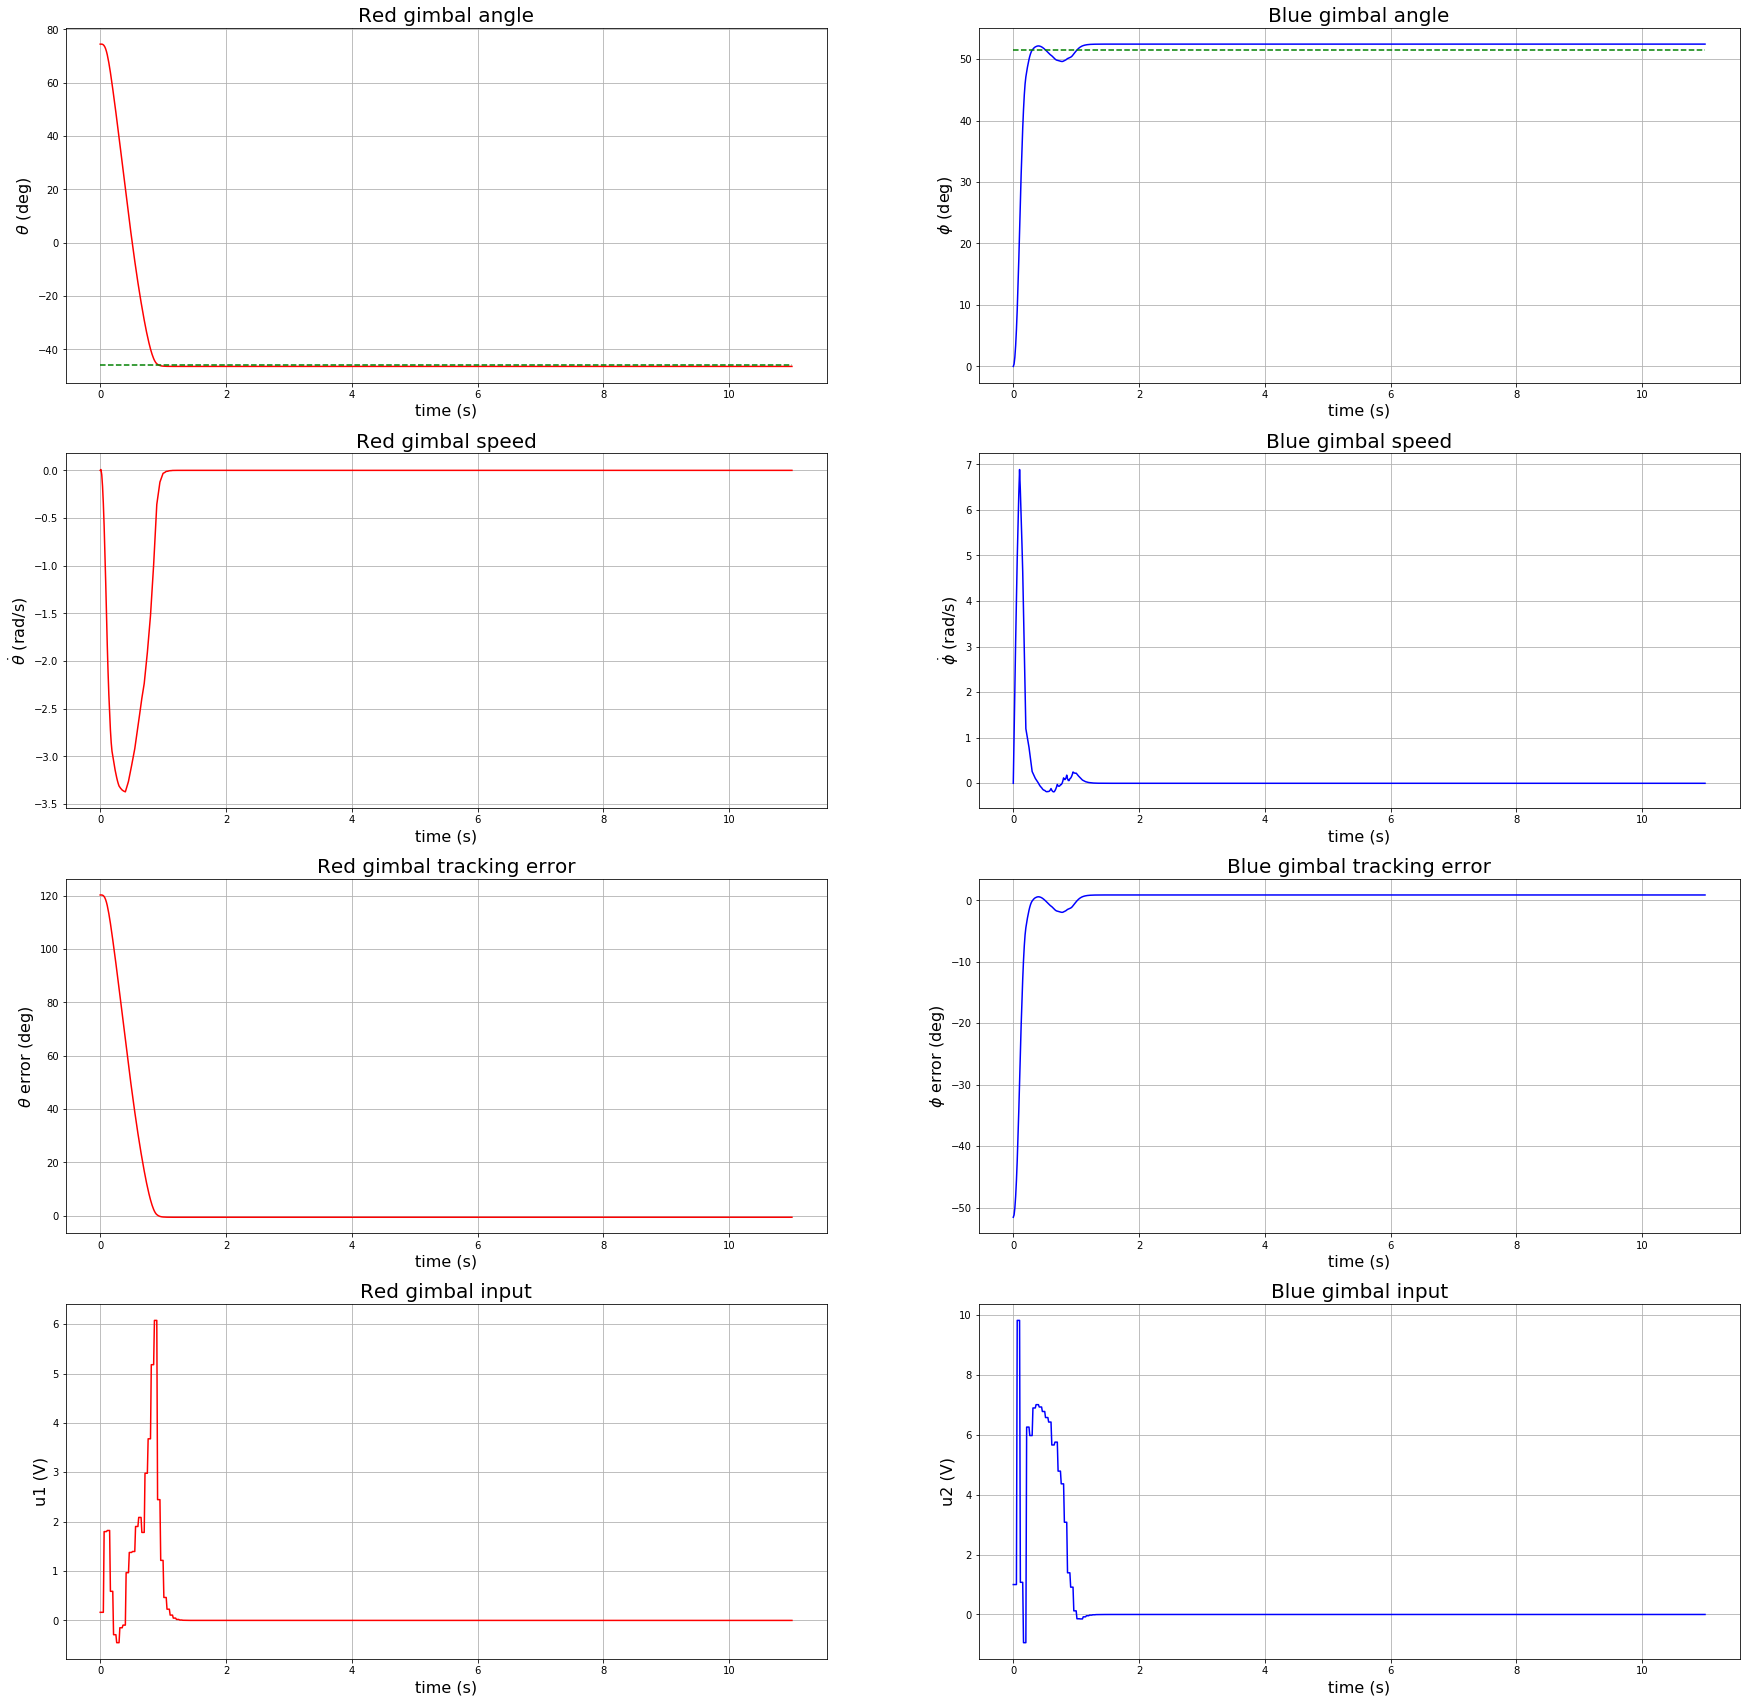

In [4]:
plot_test(x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act,t_end)

## Evaluate control performance

In [2]:
# Single evaluation
env_name = 'gyroscopeenv-v0'
agent_path = 'ddpg_q'
ss_bound = 0.25
metrics = evaluate_control(env_name,agent_path,ss_bound)
metrics

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


,MAE on θ (rad),MAE on φ (rad),Mean SS error on θ (rad),Mean SS error on φ (rad),θ in bounds %,φ in bounds %,θ unsteady %,φ unsteady %,Mean rise time on θ (s),Mean rise time on φ (s),Mean settling time on θ (s),Mean settling time on φ (s),Mean u1 (V),Mean u2 (V),Mean u1 difference (V),Mean u2 difference (V),Convergence time (min)
Config.,,,,,,,,,,,,,,,,,
ddpg_q,0.502788,0.391088,0.533114,0.377736,21.5,24.0,28.5,32.0,0.296221,0.332552,0.89564,0.722135,1.748288,1.616401,0.241502,0.285933,15.184833


In [2]:
# Init dataframe
env_name = 'gyroscopeenv-v0'
agent_paths = ['ddpg_q','ddpg_q_ep','ddpg_q_p','ddpg_q_e','ddpg_q_b','ddpg_a','ddpg_n']
ss_bound = 0.25

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

/home/matthieulc/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [22]:
# Manipulate
metrics_man = metrics[['$\theta$ MAE (rad)','$\phi$ MAE (rad)','$\theta$ MSSE (rad)','$\phi$ MSSE (rad)','$\theta$ in bounds (%)','$\phi$ in bounds (%)','$\theta$ unsteady (%)','$\phi$ unsteady (%)','u1 (V)','u2 (V)','u1 variation (V)','u2 variation (V)']]
metrics_man = metrics_man.loc[['ddpg_q','ddpg_q_ep','ddpg_q_p','ddpg_q_e','ddpg_q_b'],:]
metrics_man = metrics_man.transpose()
metrics_man = metrics_man.round(2)
metrics_man

Config.,ddpg_q,ddpg_q_ep,ddpg_q_p,ddpg_q_e,ddpg_q_b
$\theta$ MAE (rad),0.51,0.77,0.52,0.40,0.63
$\phi$ MAE (rad),0.36,0.54,0.37,0.29,0.46
$\theta$ MSSE (rad),0.46,0.60,0.42,0.29,0.54
$\phi$ MSSE (rad),0.32,0.48,0.31,0.21,0.40
$\theta$ in bounds (%),39.50,40.00,38.00,65.50,28.00
$\phi$ in bounds (%),45.50,34.50,46.50,74.00,27.50
$\theta$ unsteady (%),0.00,0.00,0.00,0.00,5.00
$\phi$ unsteady (%),11.00,0.00,0.00,3.00,8.00
u1 (V),1.83,1.38,1.10,0.97,1.66
u2 (V),1.54,0.91,0.95,1.07,1.94


In [23]:
# To LaTex
print(metrics_man.to_latex(escape=False))

\begin{tabular}{lrrrrr}
\toprule
Config. &  ddpg_q &  ddpg_q_ep &  ddpg_q_p &  ddpg_q_e &  ddpg_q_b \\
\midrule
$\theta$ MAE (rad)     &    0.51 &       0.77 &      0.52 &      0.40 &      0.63 \\
$\phi$ MAE (rad)       &    0.36 &       0.54 &      0.37 &      0.29 &      0.46 \\
$\theta$ MSSE (rad)    &    0.46 &       0.60 &      0.42 &      0.29 &      0.54 \\
$\phi$ MSSE (rad)      &    0.32 &       0.48 &      0.31 &      0.21 &      0.40 \\
$\theta$ in bounds (%) &   39.50 &      40.00 &     38.00 &     65.50 &     28.00 \\
$\phi$ in bounds (%)   &   45.50 &      34.50 &     46.50 &     74.00 &     27.50 \\
$\theta$ unsteady (%)  &    0.00 &       0.00 &      0.00 &      0.00 &      5.00 \\
$\phi$ unsteady (%)    &   11.00 &       0.00 &      0.00 &      3.00 &      8.00 \\
u1 (V)                 &    1.83 &       1.38 &      1.10 &      0.97 &      1.66 \\
u2 (V)                 &    1.54 &       0.91 &      0.95 &      1.07 &      1.94 \\
u1 variation (V)       &    0.25 &    

In [24]:
# Manipulate
metrics_man = metrics[['$\theta$ MAE (rad)','$\phi$ MAE (rad)','$\theta$ MSSE (rad)','$\phi$ MSSE (rad)','$\theta$ in bounds (%)','$\phi$ in bounds (%)','$\theta$ unsteady (%)','$\phi$ unsteady (%)','u1 (V)','u2 (V)','u1 variation (V)','u2 variation (V)']]
metrics_man = metrics_man.loc[['ddpg_a','ddpg_n'],:]
metrics_man = metrics_man.transpose()
metrics_man = metrics_man.round(2)
metrics_man

Config.,ddpg_a,ddpg_n
$\theta$ MAE (rad),0.41,0.49
$\phi$ MAE (rad),0.34,0.32
$\theta$ MSSE (rad),0.33,0.17
$\phi$ MSSE (rad),0.25,0.16
$\theta$ in bounds (%),51.50,82.50
$\phi$ in bounds (%),54.50,89.00
$\theta$ unsteady (%),0.00,0.00
$\phi$ unsteady (%),0.00,0.00
u1 (V),0.98,0.82
u2 (V),0.77,0.59


In [25]:
# To LaTex
print(metrics_man.to_latex(escape=False))

\begin{tabular}{lrr}
\toprule
Config. &  ddpg_a &  ddpg_n \\
\midrule
$\theta$ MAE (rad)     &    0.41 &    0.49 \\
$\phi$ MAE (rad)       &    0.34 &    0.32 \\
$\theta$ MSSE (rad)    &    0.33 &    0.17 \\
$\phi$ MSSE (rad)      &    0.25 &    0.16 \\
$\theta$ in bounds (%) &   51.50 &   82.50 \\
$\phi$ in bounds (%)   &   54.50 &   89.00 \\
$\theta$ unsteady (%)  &    0.00 &    0.00 \\
$\phi$ unsteady (%)    &    0.00 &    0.00 \\
u1 (V)                 &    0.98 &    0.82 \\
u2 (V)                 &    0.77 &    0.59 \\
u1 variation (V)       &    0.10 &    0.08 \\
u2 variation (V)       &    0.13 &    0.05 \\
\bottomrule
\end{tabular}

